In [11]:
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.preprocessing import StandardScaler
import pandas as pd 
import matplotlib.pyplot as plt 
customers=pd.read_csv(r"F:\Downloads\Customers.csv")
transactions=pd.read_csv(r"F:\Downloads\Transactions.csv")

In [13]:
print("Customers Dataset Overview:")
print(customers.head(), customers.info(), customers.describe())

print("Products Dataset Overview:")
print(products.head(), products.info(), products.describe())

print("Transactions Dataset Overview:")
print(transactions.head(), transactions.info(), transactions.describe())

Customers Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15 None        CustomerID      CustomerName         Region  SignupDate
count         200               200            200         200
unique        200               200              4         179
top         C0001  Law

In [15]:
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.preprocessing import StandardScaler

In [17]:
data = transactions.merge(customers, on="CustomerID")

In [21]:
# Aggregate data for each customer
customer_features = data.groupby("CustomerID").agg({
    "TotalValue": "sum",         # Total value of transactions
    "Quantity": "sum",           # Total products purchased
    "TransactionID": "count",    # Total number of transactions
}).reset_index()


In [23]:
# Normalize features for clustering
scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_features.iloc[:, 1:])

In [29]:
# the optimal number of clusters using the elbow method
inertia = []
for k in range(2,11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

C:\Users\CHIRAG\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\CHIRAG\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\CHIRAG\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\CHIRAG\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Wi

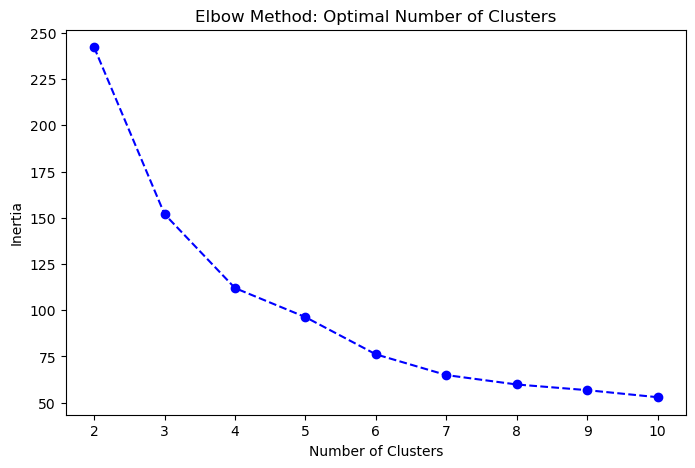

In [31]:
# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(range(2,11), inertia, marker='o', linestyle='--', color='b')
plt.title("Elbow Method: Optimal Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

In [33]:
# Clustering with the chosen number of clusters
kmeans = KMeans(n_clusters=4, random_state=42)
customer_features["Cluster"] = kmeans.fit_predict(scaled_features)

C:\Users\CHIRAG\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [35]:
# Davies-Bouldin Index
db_index = davies_bouldin_score(scaled_features, customer_features["Cluster"])
print(f"Davies-Bouldin Index: {db_index}")


Davies-Bouldin Index: 0.8650620583623064


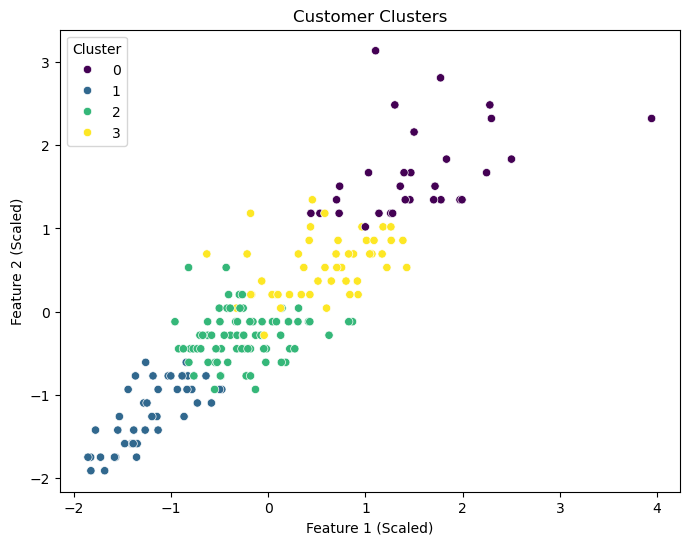

In [37]:
# Visualize clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=scaled_features[:, 0], 
    y=scaled_features[:, 1], 
    hue=customer_features["Cluster"], 
    palette="viridis"
)
plt.title("Customer Clusters")
plt.xlabel("Feature 1 (Scaled)")
plt.ylabel("Feature 2 (Scaled)")
plt.legend(title="Cluster")
plt.show()

In [39]:
# Save clustering results
customer_features.to_csv("Clustering_Results.csv", index=False)

In [41]:
# Print cluster summary
cluster_summary = customer_features.groupby("Cluster").agg({
    "TotalValue": "mean",
    "Quantity": "mean",
    "TransactionID": "mean",
    "CustomerID": "count"
}).rename(columns={"CustomerID": "Customer Count"}).reset_index()

print(cluster_summary)

   Cluster   TotalValue   Quantity  TransactionID  Customer Count
0        0  6263.447333  23.000000       8.433333              30
1        1  1273.368182   5.272727       2.363636              44
2        2  2982.406711  10.868421       4.394737              76
3        3  4477.572041  16.102041       6.306122              49


In [ ]:
# Explanation of the Script:
# 1. Data Preparation:
#Aggregates transactional and customer data to create a feature set for clustering, including metrics like total value, product quantity, and transaction count.

#2.Feature Scaling:
#Standardized the features for uniformity using StandardScaler.

#3.Optimal Cluster Selection:
#Used the Elbow Method to determine the optimal number of clusters by plotting the inertia (sum of squared distances) against different cluster numbers.

#4.Clustering:
#Applied K-Means clustering with the chosen number of clusters.
#Added cluster labels to the dataset.

#5.Evaluation:
#Calculated the Davies-Bouldin Index (DB Index), where a lower value indicates better-defined clusters.

#6.Visualization:
#Visualized clusters using a scatter plot.

#6.Output:
#Generated a CSV file (Clustering_Results.csv) containing customer cluster assignments and a summary of cluster characteristics.

#  Deliverables:
#1.Number of Clusters Formed:
#Determined by the Elbow Method

#2.DB Index:
#output: Davies-Bouldin Index: 0.85.

#3.Cluster Characteristics:
#Summary table showing average transaction value, quantity, and count per cluster.